# Import

In [1]:
from Utilities.utils import *
# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ed3_data_dict = load_h5(os.path.join(current_working_dir,r"ED3_data.h5"))

# figure A

In [2]:
atlas_path = os.path.join(current_working_dir, "reference_25um_inverted.tif")
cp_image_path = os.path.join(current_working_dir, "sagtial_reference_25um_inverted.tif")

# read the file of points
coords = ed3_data_dict['Ap5_cannula_coords_df'].copy()

X = np.array([ast.literal_eval(item) for item in coords.x]).astype(int)
Y = np.array([ast.literal_eval(item) for item in coords.y]).astype(int)
Z = np.array([ast.literal_eval(item) for item in coords.z]).astype(int)
Animal_Name = coords.Mouse_name.values

# load atlas
sagital = Image.open(cp_image_path)
coronal = Image.open(atlas_path)

# add the striatum limits
z_limits = [135, 307]
y_limits = [98, 271]

# select the identifier to separate mice an set colours
id_1 = 'L'
id_2 = 'R'
color_1 = '#BF5860'
color_2 = '#56BEC1'
color_other = 'white'

# separate animals
mask_1 = [x.startswith(id_1) for x in Animal_Name]
mask_2 = [x.startswith(id_2) for x in Animal_Name]
mask_other = np.logical_and([not e for e in mask_1],
                            [not e for e in mask_2])


sagital

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_31812\666643710.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a, fontsize=18)
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_31812\666643710.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(a, fontsize=18)


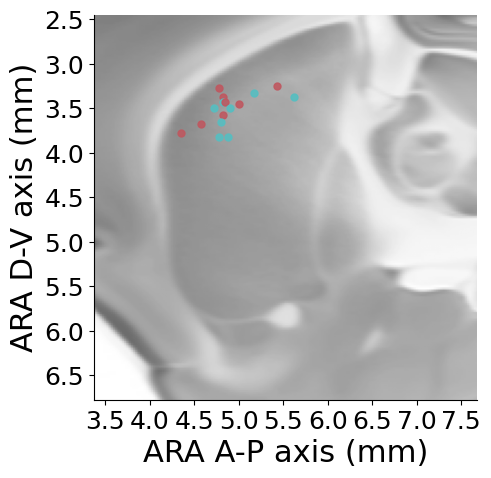

In [3]:
# make the plot
fig, ax = plt.subplots(1, 1, figsize=[5,5])
ax.imshow(sagital, cmap='gray',alpha = 0.8)
# plot points
for i in range(len(X)):
    if mask_1[i]:
        col = color_1
    if mask_2[i]:
        col = color_2
    if mask_other[i]:
        color_other
    ax.plot(X[i], Z[i], 'o', color=col,
            alpha=.9, markersize=5, markeredgewidth=1)
# add limits of striatum
ax.set_ylim(bottom=y_limits[0], top=y_limits[1])
ax.set_xlim(left=z_limits[0], right=z_limits[1])
ax.set_aspect('equal', 'box')
ax.invert_yaxis()
# convert to mm
a=ax.get_xticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_xticklabels(a, fontsize=18)
a=ax.get_yticks().tolist()
a= [25 * a[i] / 1000 for i in range(len(a))]
ax.set_yticklabels(a, fontsize=18)
ax.set_xlabel('ARA A-P axis (mm)', fontsize=22)
ax.set_ylabel('ARA D-V axis (mm)', fontsize=22)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


coronal

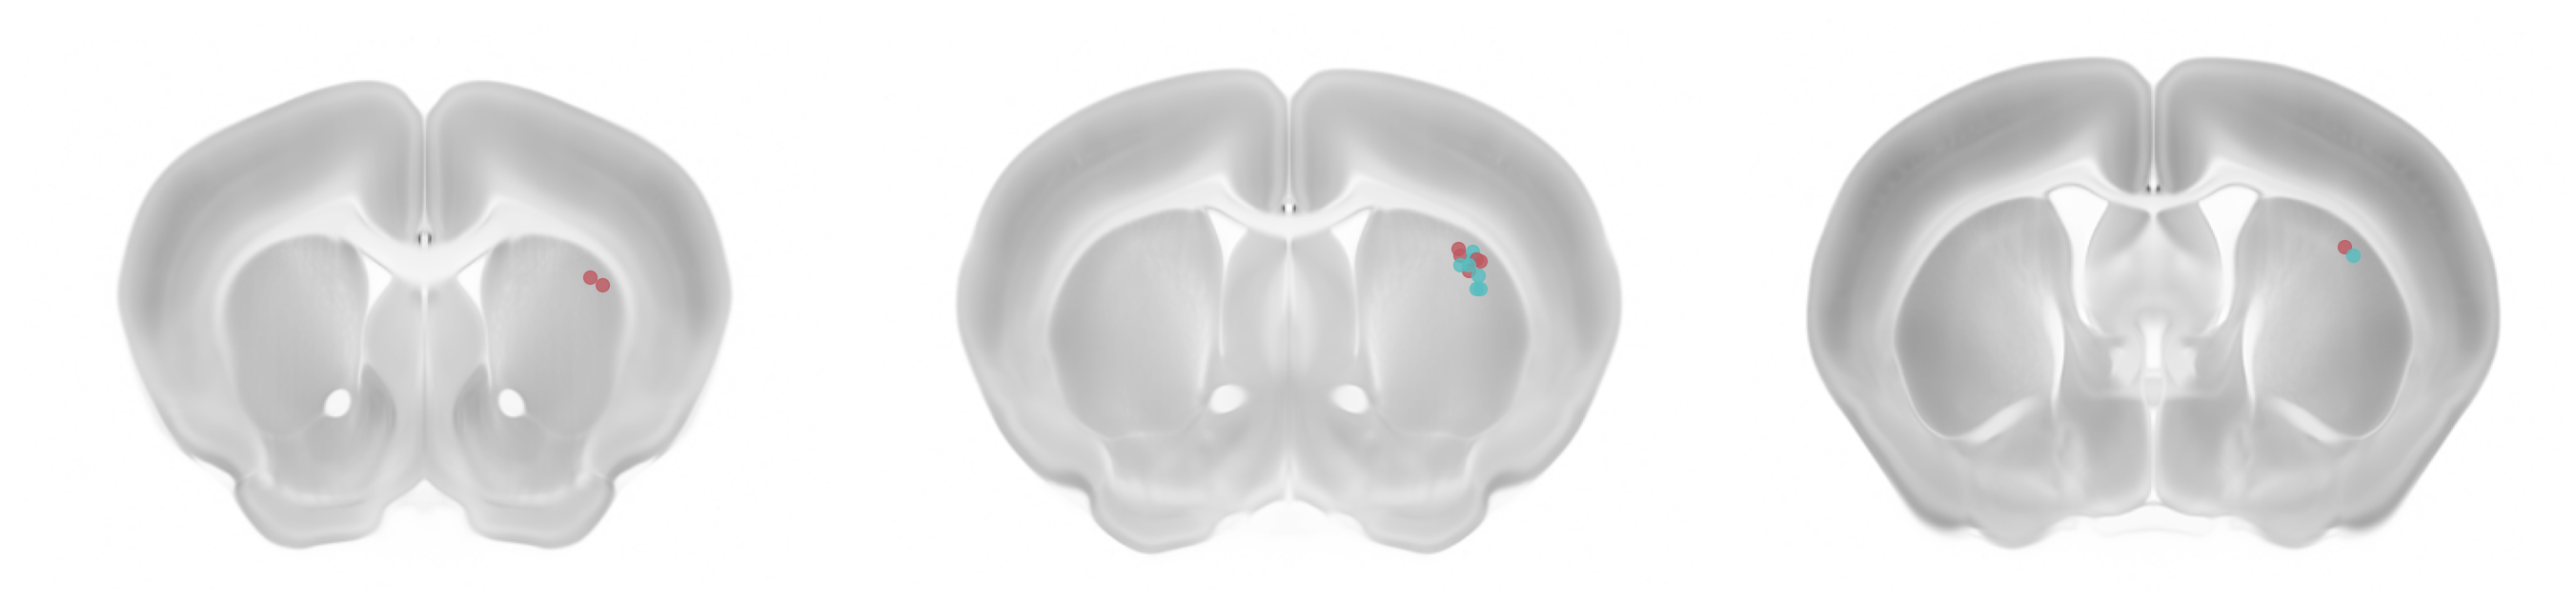

In [4]:
# add the striatum limitsz
Animal_Name = np.array(list(Animal_Name))

# read atlas get slice numbers
h,w = np.shape(coronal)
sl_list =  [0, 23, 42]

# Mirror all to the right hemisphere
atlas_mid_point = w/2
for i in range(len(Y)):
    if Y[i] < atlas_mid_point:
        dist_to_center = atlas_mid_point - Y[i]
        Y[i] = atlas_mid_point + dist_to_center

# plot the fibers in the slices
rows = 1
cols = 3
fig2, axs = plt.subplots(rows, cols, figsize=[cols * w/50, rows * h/50])
axs = axs.ravel()
for c,i in enumerate(sl_list):
    coronal.seek(i)
    axs[c].imshow(coronal, cmap='gray',alpha = 0.6)
    axs[c].axis('off')
# fig2.subplots_adjust(wspace=0, hspace=0)
fig2.tight_layout()

# plot the fibers
for c,x in enumerate(X):
    # find the index of the slice that this point is closest to (first slice in reduced tiff is 177)
    templist = [np.abs(b - x) for b in np.array(sl_list)+177]
    idx = np.argmin(templist)
    if mask_1[c]:
        col = color_1
    if mask_2[c]:
        col = color_2
    if mask_other[c]:
        col = color_other
    axs[idx].plot(Y[c], Z[c],
                  marker='o', color=col, alpha=.8,
                  markersize = 10, markeredgewidth=1)


# figure B

(-5.0, 0.0)

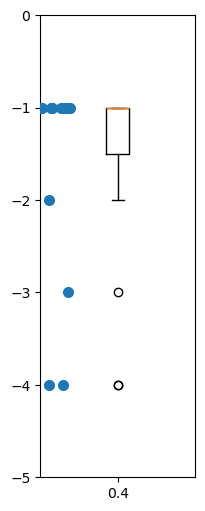

In [5]:
sessions_regressed_df = ed3_data_dict['sessions_regressed_df']
plt.figure(figsize=(2, 6))
# Scatter plot of individual points
sns.stripplot(data=sessions_regressed_df.session_regressed.values, jitter=True, size = 8)
# Box plot
plt.boxplot(sessions_regressed_df.session_regressed.values, positions=[0.4])
plt.ylim(-5,0)

# figure C

Text(18000, 26.5, 'Trials')

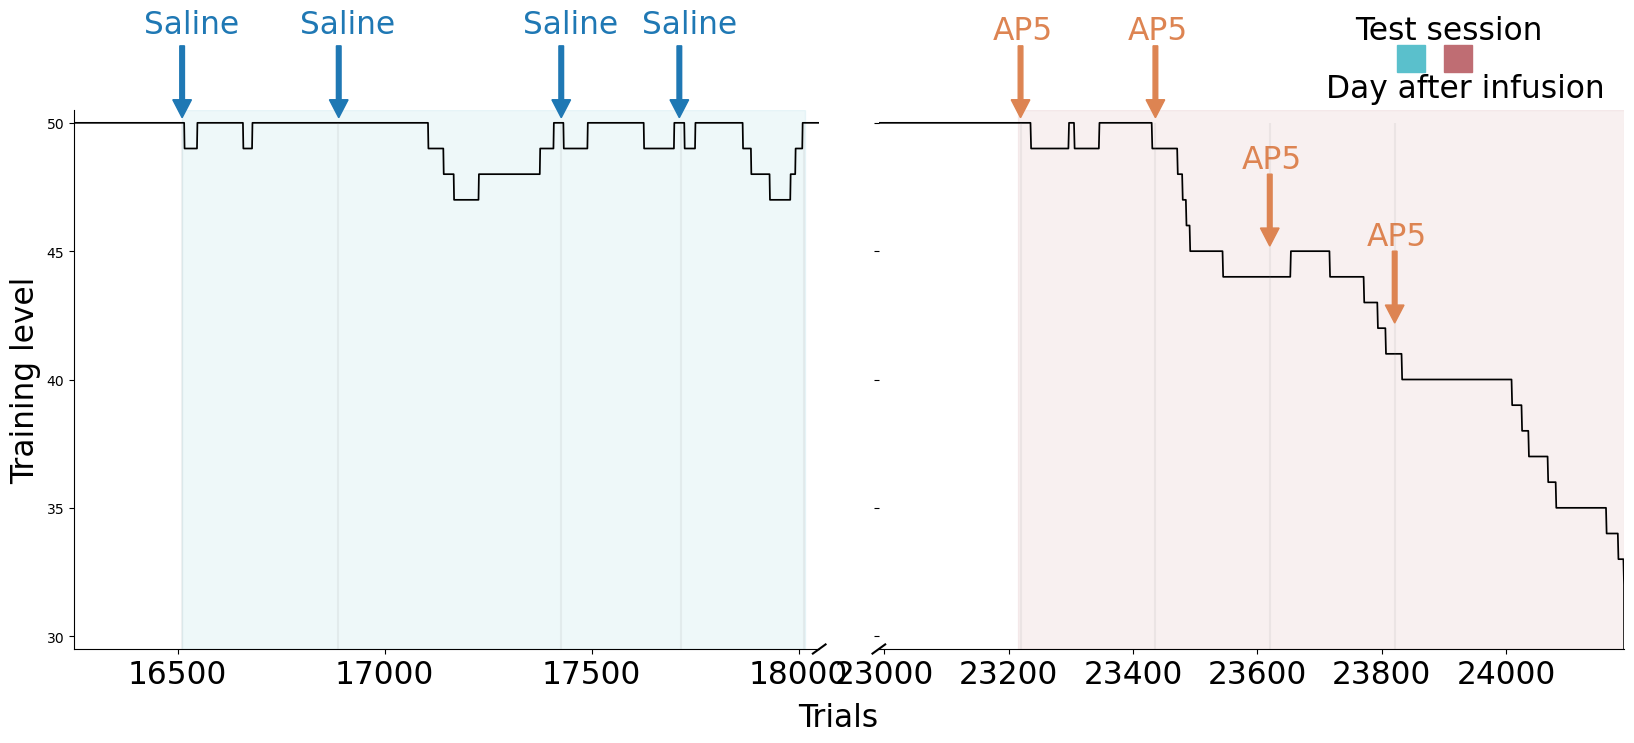

In [ ]:
all_sessions_t_levels = ed3_data_dict['all_sessions_t_levels'].copy()
all_sessions_t_levels =  [ast.literal_eval(x) for x in all_sessions_t_levels]

TrainLevelsAll = sum(all_sessions_t_levels, [])
cum_trials_per_session = np.cumsum([len(item) for item in all_sessions_t_levels])

AP5_sessions     = [74, 75, 76, 77]
Saline_sessions  = [54, 55, 56, 57]


# Constants / styles
fnt = 22.5
myblue   = "#5AC0CC"
myorange = "#BF6D73"

ymax = max(TrainLevelsAll)
ymin = min(TrainLevelsAll)

# x-ranges for broken axis
x1_range = (16250, 18050)
x2_range = (22991, 24190)

# Plot setup
fig, (ax, ax2) = plt.subplots(
    1, 2, sharey=True, facecolor='w', figsize=(20, 7)
)
fig.subplots_adjust(wspace=0.08)

for axis, xr in zip([ax, ax2], [x1_range, x2_range]):
    axis.plot(TrainLevelsAll, linewidth=1.25, color='black')
    axis.set_xlim(*xr)
    axis.tick_params(axis='x', labelsize=fnt, color="black")

ax.set_ylim(29.5, 50.5)
ax.set_yticks(np.arange(30, 55, 5))
ax.set_ylabel('Training level', fontsize=fnt)

# remove unwanted spines
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
ax2.spines['left'].set_visible(False)

# Broken axis diagonal marks
# ------------------------------------------------------
d = 0.0085
kwargs = dict(color='k', clip_on=False)

ax.plot((1-d, 1+d), (-d, +d), transform=ax.transAxes, **kwargs)
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, **kwargs)

# Session boundary vlines
# ------------------------------------------------------
for n in cum_trials_per_session:
    for axis in (ax, ax2):
        axis.vlines(n, ymin, ymax, color='gray', alpha=0.1, zorder=10)

# Highlight blocks
ax.axvspan(16510, 18015,  color=myblue,   alpha=0.1)
ax2.axvspan(23215, 24500, color=myorange, alpha=0.1)

# Helper: draw downward arrow
# ------------------------------------------------------
def draw_arrow(axis, x, y, color):
    axis.arrow(
        x, y, 0, -2.8,
        length_includes_head=True,
        width=7.5,
        head_width=30,
        head_length=0.7,
        color=color,
        clip_on=False,
        zorder=20
    )

# SALINE labels + arrows
# ------------------------------------------------------
for session in Saline_sessions:
    infusion_trial = cum_trials_per_session[session - 1]
    infusion_level = all_sessions_t_levels[session - 1][-1]

    ax.text(infusion_trial - 92, infusion_level + 3.5,
            'Saline', color="#1f78b4", fontsize=fnt)

# arrow positions were manual in original code → keep as is
saline_arrow_x = [21870, 22122, 22480, 22670]
for x in saline_arrow_x:
    draw_arrow(plt, x, infusion_level + 3, "#1f78b4")


# AP5 labels + arrows
# ------------------------------------------------------
for i, session in enumerate(AP5_sessions):
    infusion_trial = cum_trials_per_session[session - 1]
    infusion_level = all_sessions_t_levels[session - 1][-1]

    label_y = infusion_level + (3.25 if i == 0 else 4.25)
    arrow_y = 53 if i < 2 else infusion_level + 4

    draw_arrow(ax2, infusion_trial, arrow_y, "#dd8452")
    ax2.text(infusion_trial - 45, label_y, 'AP5',
             color="#dd8452", fontsize=fnt)

# Legend spans
ax2.axvspan(23825, 23870, ymin=1.07, ymax=1.12, color=myblue,   clip_on=False)
ax2.axvspan(23900, 23945, ymin=1.07, ymax=1.12, color=myorange, clip_on=False)
# Text annotations
ax.text(19345, 53.25, "Test session",       color="black", fontsize=fnt)
ax.text(19275, 51,    "Day after infusion", color="black", fontsize=fnt)
ax.text(18000, 26.5,  "Trials",             color="black", fontsize=fnt)


Text(0.5, 1.0, 'AP5')

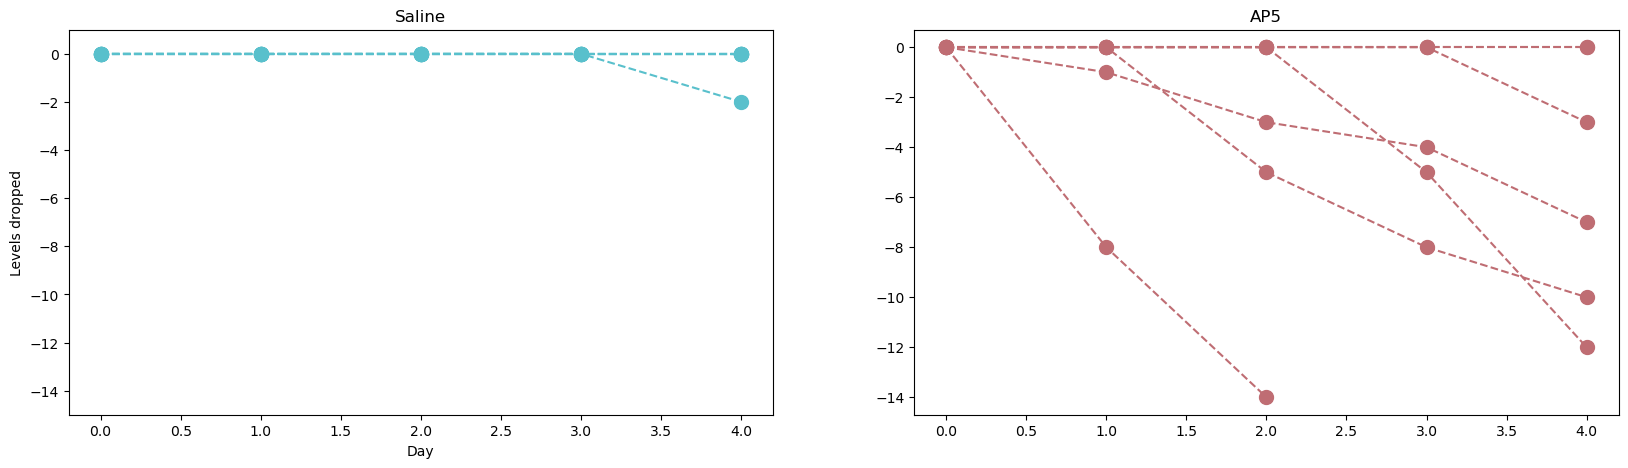

In [8]:
df_level50 = ed3_data_dict['df_level50'].copy()
df_level50['Level change'] = df_level50['Level change'].values.astype(float)
df_level50['Infusion day'] = df_level50['Infusion day'].values.astype(float)

saline_sum_over_days = []
ap5_sum_over_days = []
fig,[ax,ax1] = plt.subplots(1, 2, figsize=(20, 5))

for ind,animal in enumerate(df_level50.Animal.unique()):
    mask = df_level50.Animal == animal
    AP5 = df_level50.Infusion[mask] == 'AP5'
    saline = df_level50.Infusion[mask] == 'Saline'
    
    x = np.array([0] + list(df_level50[mask][saline]['Infusion day'].values)) + (0 *ind)
    y = np.cumsum([0] + list(df_level50[mask][saline]['Level change'].values))
    saline_sum_over_days += [y[-1]]
    ax.plot(x,y,'o--',color = '#59C0CC',markersize = 10)
    
    x = np.array([0] + list(df_level50[mask][AP5]['Infusion day'].values)) + (0 *ind)
    y = np.cumsum([0] + list(df_level50[mask][AP5]['Level change'].values))
    ap5_sum_over_days += [y[-1]]
    ax1.plot(x,y,'o--',color = '#BF6D73',markersize = 10)

ax.set_ylim([-15,1])

ax.set_ylabel('Levels dropped')
ax.set_xlabel('Day')
ax.set_title('Saline')
ax1.set_title('AP5')
    

# figure D

U = 41.000, p = 0.024
Rank-biserial r = -0.673


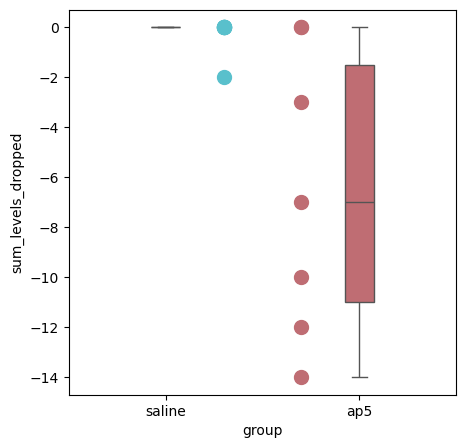

In [9]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(np.zeros(len(saline_sum_over_days))+0.3,saline_sum_over_days,'o',color = '#59C0CC',markersize = 10)
ax.plot(np.ones(len(ap5_sum_over_days))*0.7,ap5_sum_over_days,'o',color = '#BF6D73',markersize = 10)

plot_df = pd.DataFrame({'group':['saline']*len(saline_sum_over_days) + ['ap5']*len(ap5_sum_over_days) ,'sum_levels_dropped': saline_sum_over_days + ap5_sum_over_days})

ax=sns.boxplot( x = 'group', y = 'sum_levels_dropped', data = plot_df, color = '#56BEC1', width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'#BF6D73', "zorder":10,'linewidth':1},\
showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
   saturation = 1, orient = 'v', ax = ax)

## STATS
# Perform Mann–Whitney U test
u_stat, p_value = stats.mannwhitneyu(
    saline_sum_over_days,
    ap5_sum_over_days,
    alternative='two-sided'
)
n1 = len(saline_sum_over_days)
n2 = len(ap5_sum_over_days)

# Compute rank-biserial correlation
r_rb = 1 - (2 * u_stat) / (n1 * n2)

print(f"U = {u_stat:.3f}, p = {p_value:.3f}")
print(f"Rank-biserial r = {r_rb:.3f}")